In [169]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from matplotlib import pyplot as plt
import os
import imageio.v3 as iio
from PIL import Image
from colormap import rgb2hex
from matplotlib.colors import ListedColormap

########################### PARAMETERS ###########################
layers = [
    '02_image',
    '03_decoration',
    '04_text'
]
selected_layer = 0

mother_directory = os.getcwd()
image_path = mother_directory + "/destijl_dataset/" + layers[selected_layer] + "/" +"0000.png"
image = iio.imread(image_path)
H, W, C = image.shape
resize_factor = 6

In [155]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [175]:
def kmeans_cluster(image, resize_factor, num_colors):
    image = np.array(Image.fromarray(image).resize((W//resize_factor, H//resize_factor)))
    originShape = image.shape
    if(originShape[-1]>3):
        image = rgba2rgb(image)

    # Converting image into array of dimension [nb of pixels in originImage, 3]
    # based on r g b intensities    
    flatImg=np.reshape(image, [-1, 3])

    # Estimate bandwidth for meanshift algorithm    
    kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(flatImg)

    # Assignment of colors to each pixel
    labels=kmeans.labels_

    # Calculate color palette and number of colors extracted  
    colors = kmeans.cluster_centers_
    labels_unique = np.unique(labels)    
    n_clusters_ = len(labels_unique)  

    # Generate segmented image from colors using assigned labels
    segmentedImg = colors[np.reshape(labels, originShape[:2])]

    return segmentedImg, n_clusters_, colors

In [164]:
def cluster_colors(image, resize_factor, quantile):
    ''' 
        Returns
        segmentedImg: segmented image with extracted colors
        n_clusters_ : num of clusters generated by MeanShift
        colors      : extracted colors
    '''
    image = np.array(Image.fromarray(image).resize((W//resize_factor, H//resize_factor)))
    originShape = image.shape
    if(originShape[-1]>3):
        image = rgba2rgb(image)
    print(image.shape)

    # Converting image into array of dimension [nb of pixels in originImage, 3]
    # based on r g b intensities    
    flatImg=np.reshape(image, [-1, 3])

    # Estimate bandwidth for meanshift algorithm    
    bandwidth = estimate_bandwidth(flatImg, quantile=quantile, n_samples=250)    
    ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
    # ms = MeanShift(bin_seeding=True)
    ms.fit(flatImg)

    # Assignment of colors to each pixel
    labels=ms.labels_

    # Calculate color palette and number of colors extracted  
    colors = ms.cluster_centers_
    labels_unique = np.unique(labels)    
    n_clusters_ = len(labels_unique)  

    # Generate segmented image from colors using assigned labels
    segmentedImg = colors[np.reshape(labels, originShape[:2])]

    return segmentedImg, n_clusters_, colors

## MeanShift Clustering

(109, 78, 3)


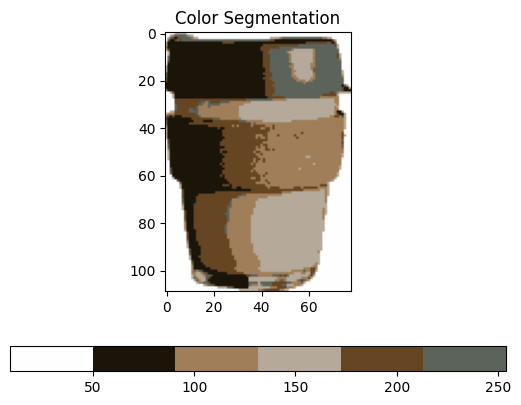

In [165]:
segmentedImg, n_clusters_, colors = cluster_colors(image, resize_factor, quantile=0.12)
# Convert RGB to hex
hex_colors = np.asarray([rgb2hex(*color) for color in colors.astype(int)])

# Plot segmented image and the color palette
fig, ax = plt.subplots()
cmap = ListedColormap(name="meanshift colors", colors=hex_colors)
im = ax.imshow(segmentedImg.astype(int), cmap=cmap)
ax.set_title("Color Segmentation")
fig.colorbar(im, ax=ax, location='bottom')

02_image
(218, 157, 3)
3
03_decoration
(218, 157, 3)
7
04_text
(218, 157, 3)
2


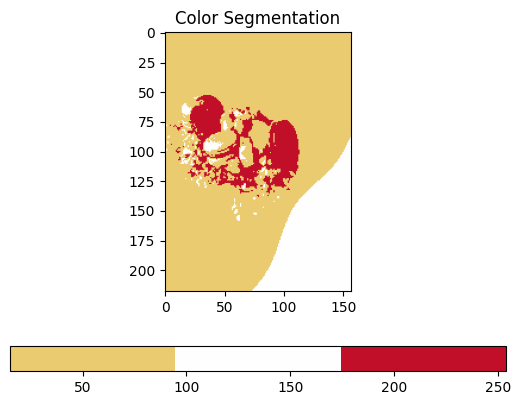

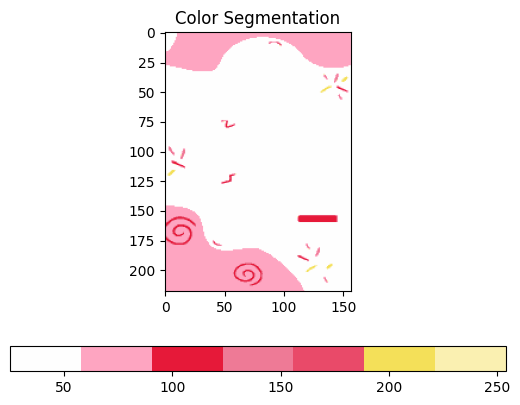

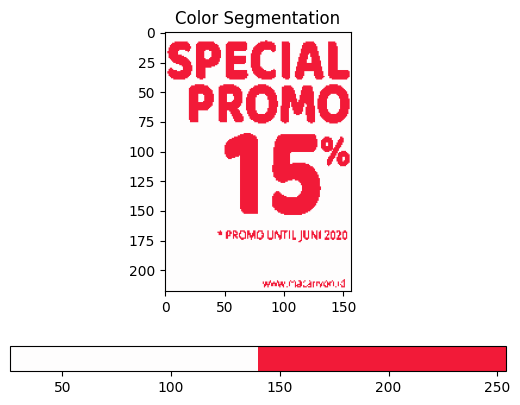

In [162]:
resize_factor=3
for layer in layers:
    print(layer)
    image_path = mother_directory + "/destijl_dataset_less_white/" + layer + "/" +"0005.png"
    image = iio.imread(image_path)
    segmentedImg, n_clusters_, colors = cluster_colors(image, resize_factor, quantile=0.2)
    print(n_clusters_)
    # Convert RGB to hex
    hex_colors = np.asarray([rgb2hex(*color) for color in colors.astype(int)])

    # Plot segmented image and the color palette
    fig, ax = plt.subplots()
    cmap = ListedColormap(name="meanshift colors", colors=hex_colors)
    im = ax.imshow(segmentedImg.astype(int), cmap=cmap)
    ax.set_title("Color Segmentation")
    fig.colorbar(im, ax=ax, location='bottom')

## KMeans Clustering

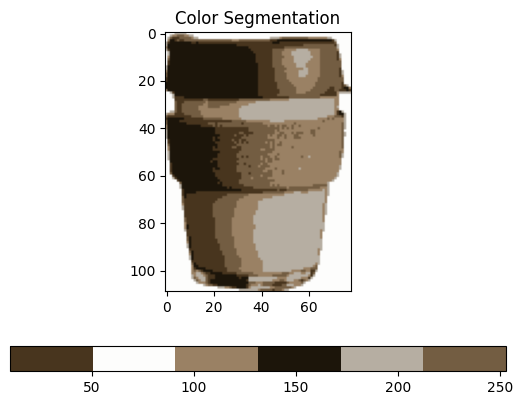

In [176]:
segmentedImg, n_clusters_, colors = kmeans_cluster(image, resize_factor, num_colors=6)
# Convert RGB to hex
hex_colors = np.asarray([rgb2hex(*color) for color in colors.astype(int)])

# Plot segmented image and the color palette
fig, ax = plt.subplots()
cmap = ListedColormap(name="meanshift colors", colors=hex_colors)
im = ax.imshow(segmentedImg.astype(int), cmap=cmap)
ax.set_title("Color Segmentation")
fig.colorbar(im, ax=ax, location='bottom')

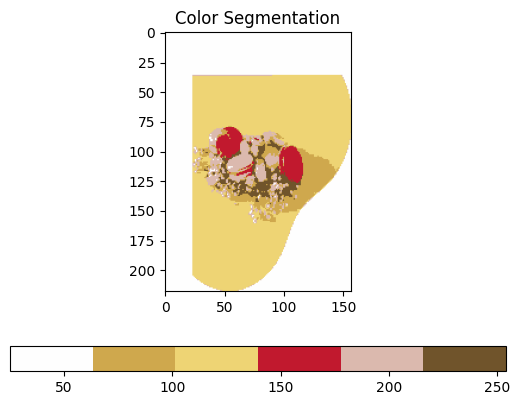

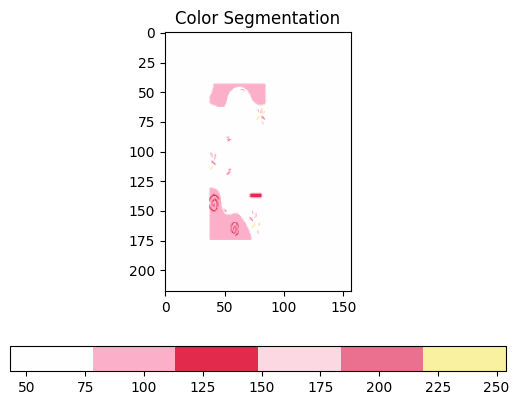

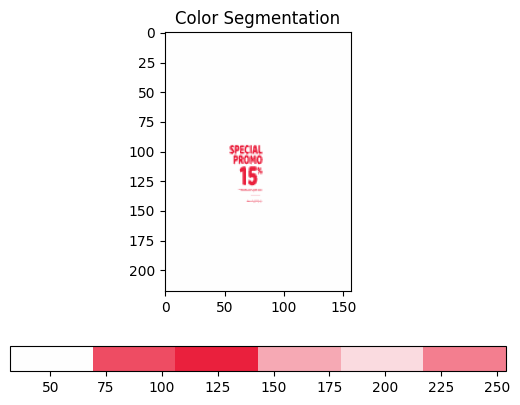

In [178]:
resize_factor=3
for layer in layers:
    image_path = mother_directory + "/destijl_dataset/" + layer + "/" +"0005.png"
    image = iio.imread(image_path)
    segmentedImg, n_clusters_, colors = kmeans_cluster(image, resize_factor, num_colors=6)
    # Convert RGB to hex
    hex_colors = np.asarray([rgb2hex(*color) for color in colors.astype(int)])

    # Plot segmented image and the color palette
    fig, ax = plt.subplots()
    cmap = ListedColormap(name="meanshift colors", colors=hex_colors)
    im = ax.imshow(segmentedImg.astype(int), cmap=cmap)
    ax.set_title("Color Segmentation")
    fig.colorbar(im, ax=ax, location='bottom')